In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from collections import Counter

In [2]:
# Loading Data
df = pd.read_csv('heart.csv')

In [3]:
# Reading Data
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
# Describe the dataset and its features.
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Checkin for missing values
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# Duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [7]:
df.duplicated().sum()

723

In [8]:
data = df.drop_duplicates()
data.duplicated().sum()

0

In [9]:
# Outliers
data_description = data.describe().T
print(data_description)

          count        mean        std    min     25%    50%     75%    max
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
sex       302.0    0.682119   0.466426    0.0    0.00    1.0    1.00    1.0
cp        302.0    0.963576   1.032044    0.0    0.00    1.0    2.00    3.0
trestbps  302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
fbs       302.0    0.149007   0.356686    0.0    0.00    0.0    0.00    1.0
restecg   302.0    0.526490   0.526027    0.0    0.00    1.0    1.00    2.0
thalach   302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
exang     302.0    0.327815   0.470196    0.0    0.00    0.0    1.00    1.0
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2
slope     302.0    1.397351   0.616274    0.0    1.00    1.0    2.00    2.0
ca        302.0    0.718543   1.006748    0.0    0.00    0.0    1.00    4.0
thal      30

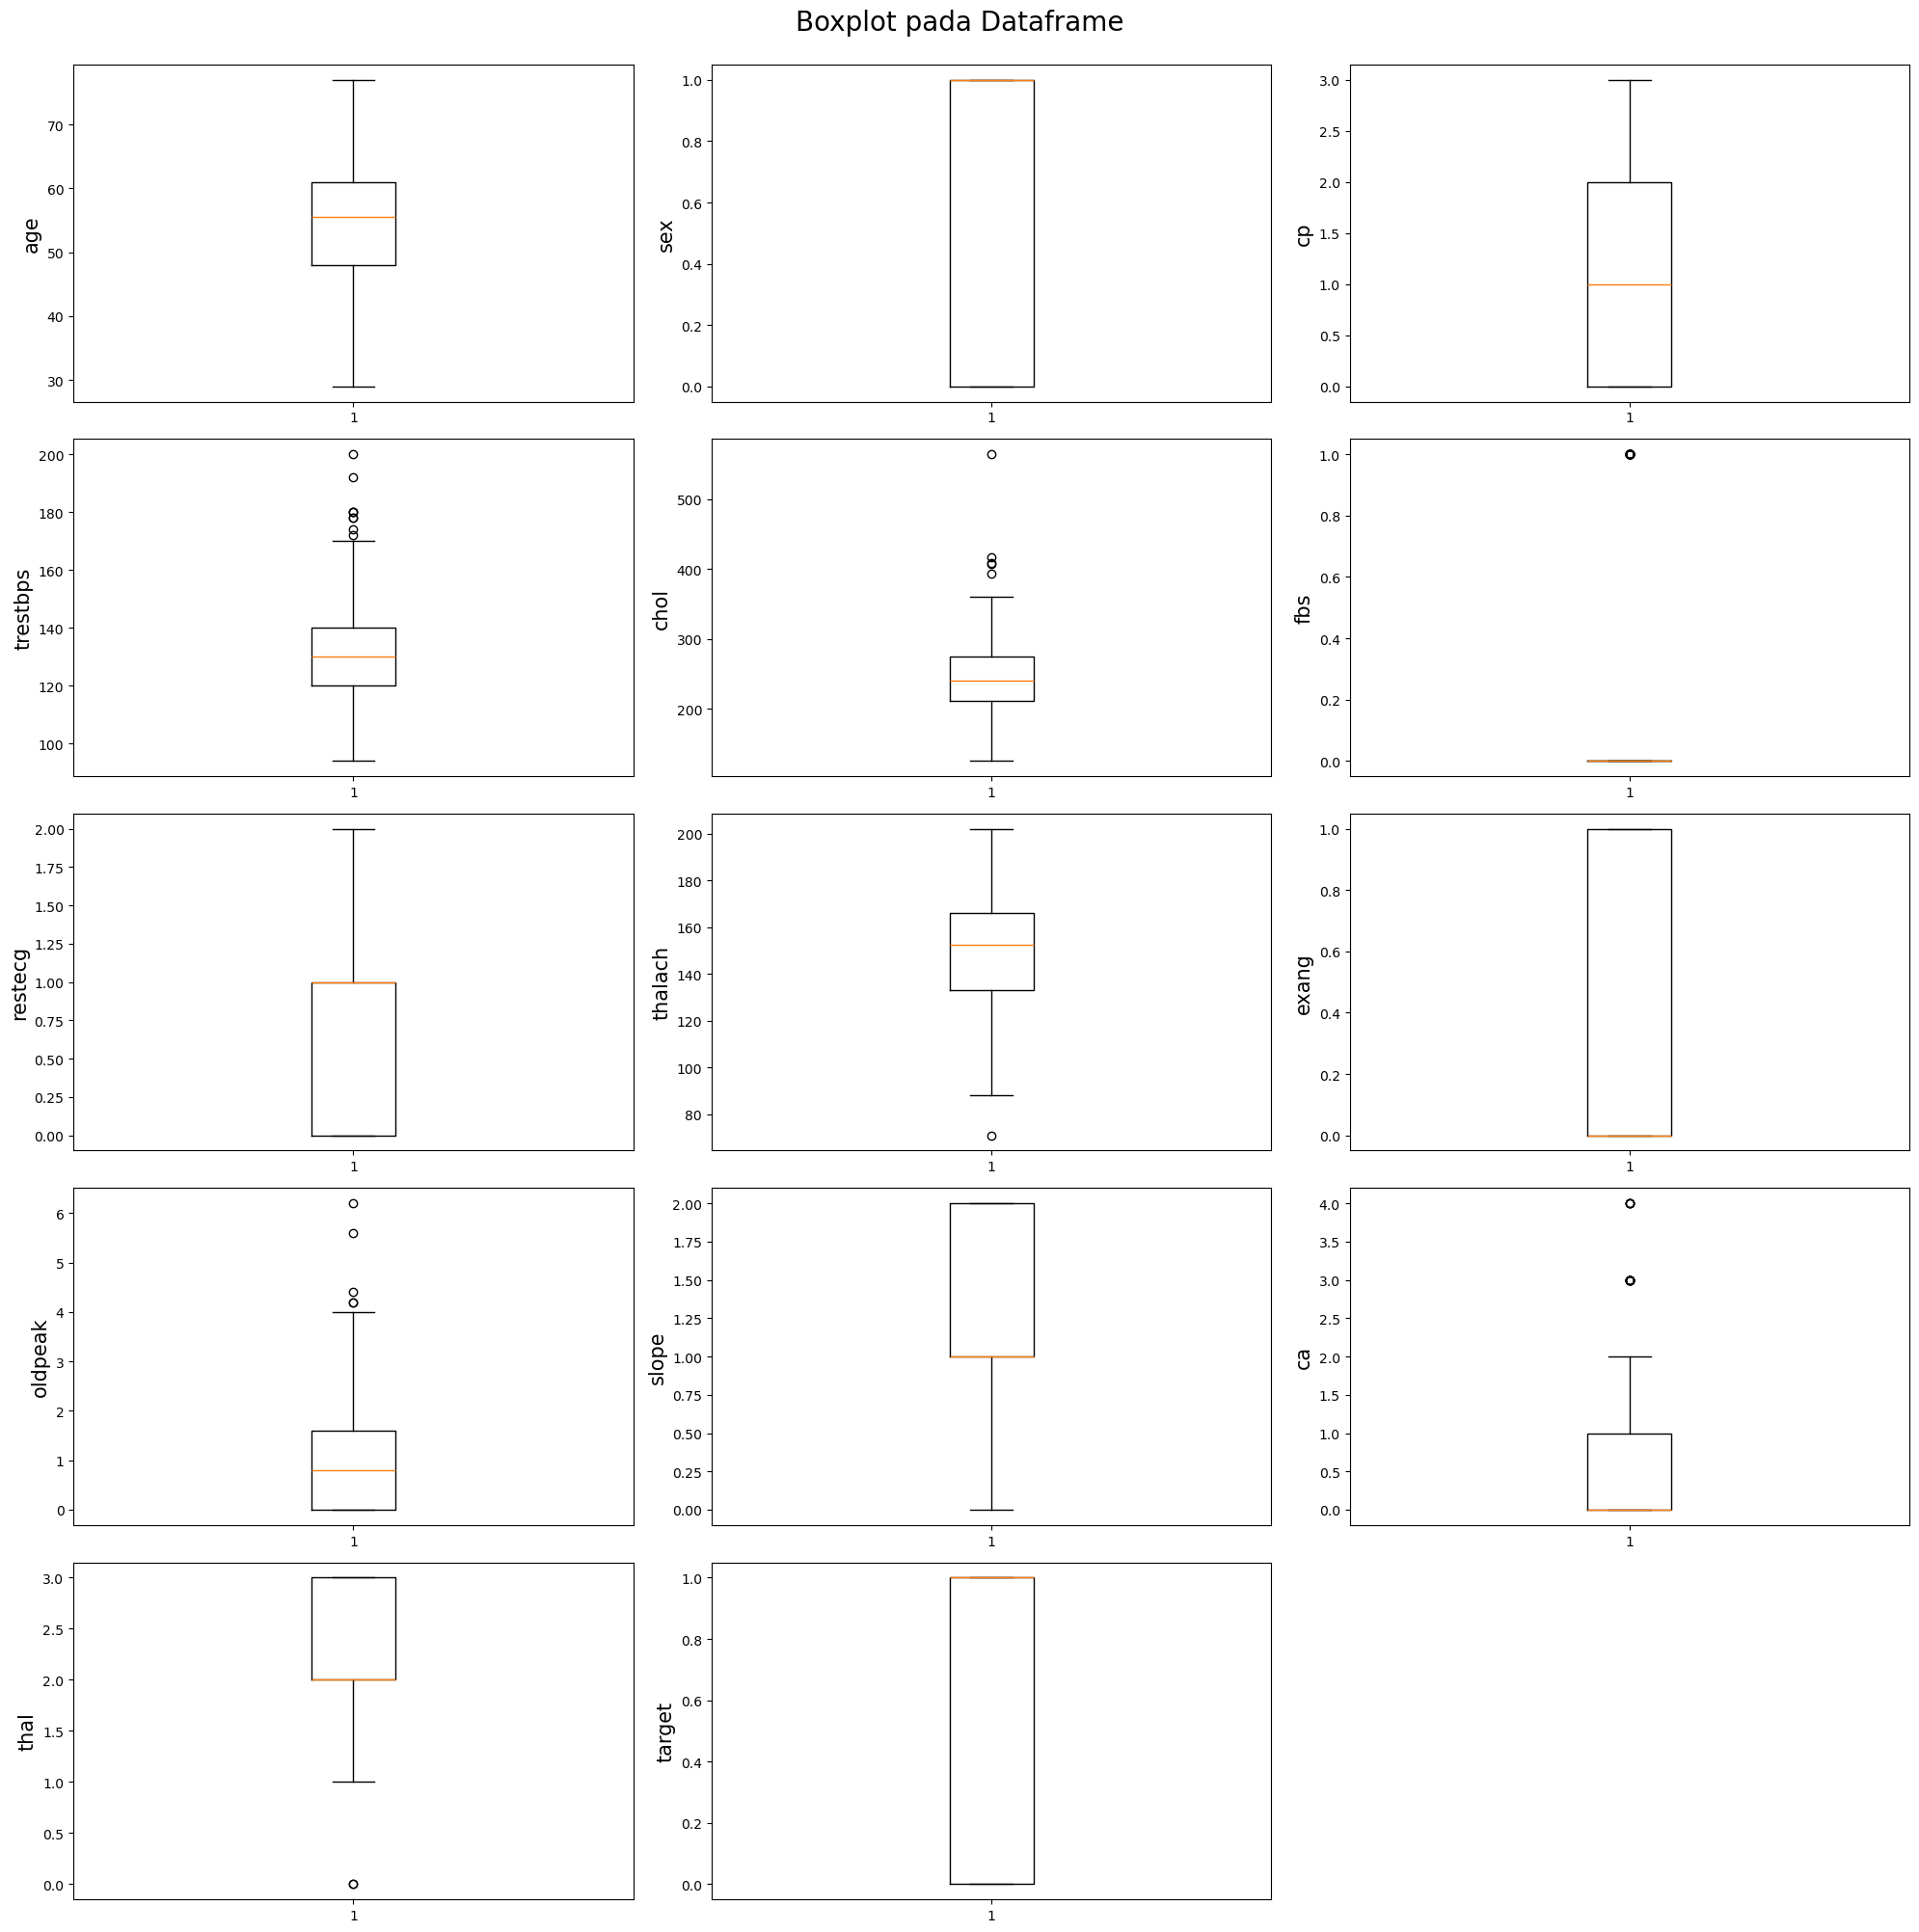

In [10]:
# Create a new figure with a specific size
plt.figure(figsize=(20,20))

# Initialize the plot number
plotnumber = 1

# Loop through each column in the dataframe
for column in data.columns:
    # Check if the plot number is less than 15 (to ensure we have enough subplots)
    if plotnumber < 15:
        # Create a subplot with 5 rows and 3 columns, and increment the plot number
        plt.subplot(5, 3, plotnumber)
        
        # Create a boxplot for the current column
        plt.boxplot(data[column])
        
        # Set the y-axis label to the column name
        plt.ylabel(column, fontsize=15)
        
    # Increment the plot number
    plotnumber += 1

# Add a title to the overall plot
plt.suptitle('Boxplot pada Dataframe', fontsize=20, y=1)

# Adjust the layout of subplots for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Calculate the first and third quartiles
q1 = data[["trestbps", "chol", "thalach", "oldpeak"]].quantile(q=0.25)
q3 = data[["trestbps", "chol","thalach","oldpeak"]].quantile(q=0.75)

# Calculate the interquartile range (IQR)
IQR = q3 - q1

# Calculate the lower and upper bounds for outliers
IQR_lower_limit = q1 - 1.5 * IQR
IQR_upper_limit = q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data["trestbps"] < IQR_lower_limit["trestbps"]) | (data["trestbps"] > IQR_upper_limit["trestbps"]) |
               (data["chol"] < IQR_lower_limit["chol"]) | (data["chol"] > IQR_upper_limit["chol"]) |
               (data["thalach"] < IQR_lower_limit["thalach"]) | (data["thalach"] > IQR_upper_limit["thalach"]) |
               (data["oldpeak"] < IQR_lower_limit["oldpeak"]) | (data["oldpeak"] > IQR_upper_limit["oldpeak"])]

# Handle outliers by removing them
data2 = data[(data["trestbps"] >= IQR_lower_limit["trestbps"]) & (data["trestbps"] <= IQR_upper_limit["trestbps"]) &
                   (data["chol"] >= IQR_lower_limit["chol"]) & (data["chol"] <= IQR_upper_limit["chol"]) &
                   (data["thalach"] >= IQR_lower_limit["thalach"]) & (data["thalach"] <= IQR_upper_limit["thalach"]) &
                   (data["oldpeak"] >= IQR_lower_limit["oldpeak"]) & (data["oldpeak"] <= IQR_upper_limit["oldpeak"])]


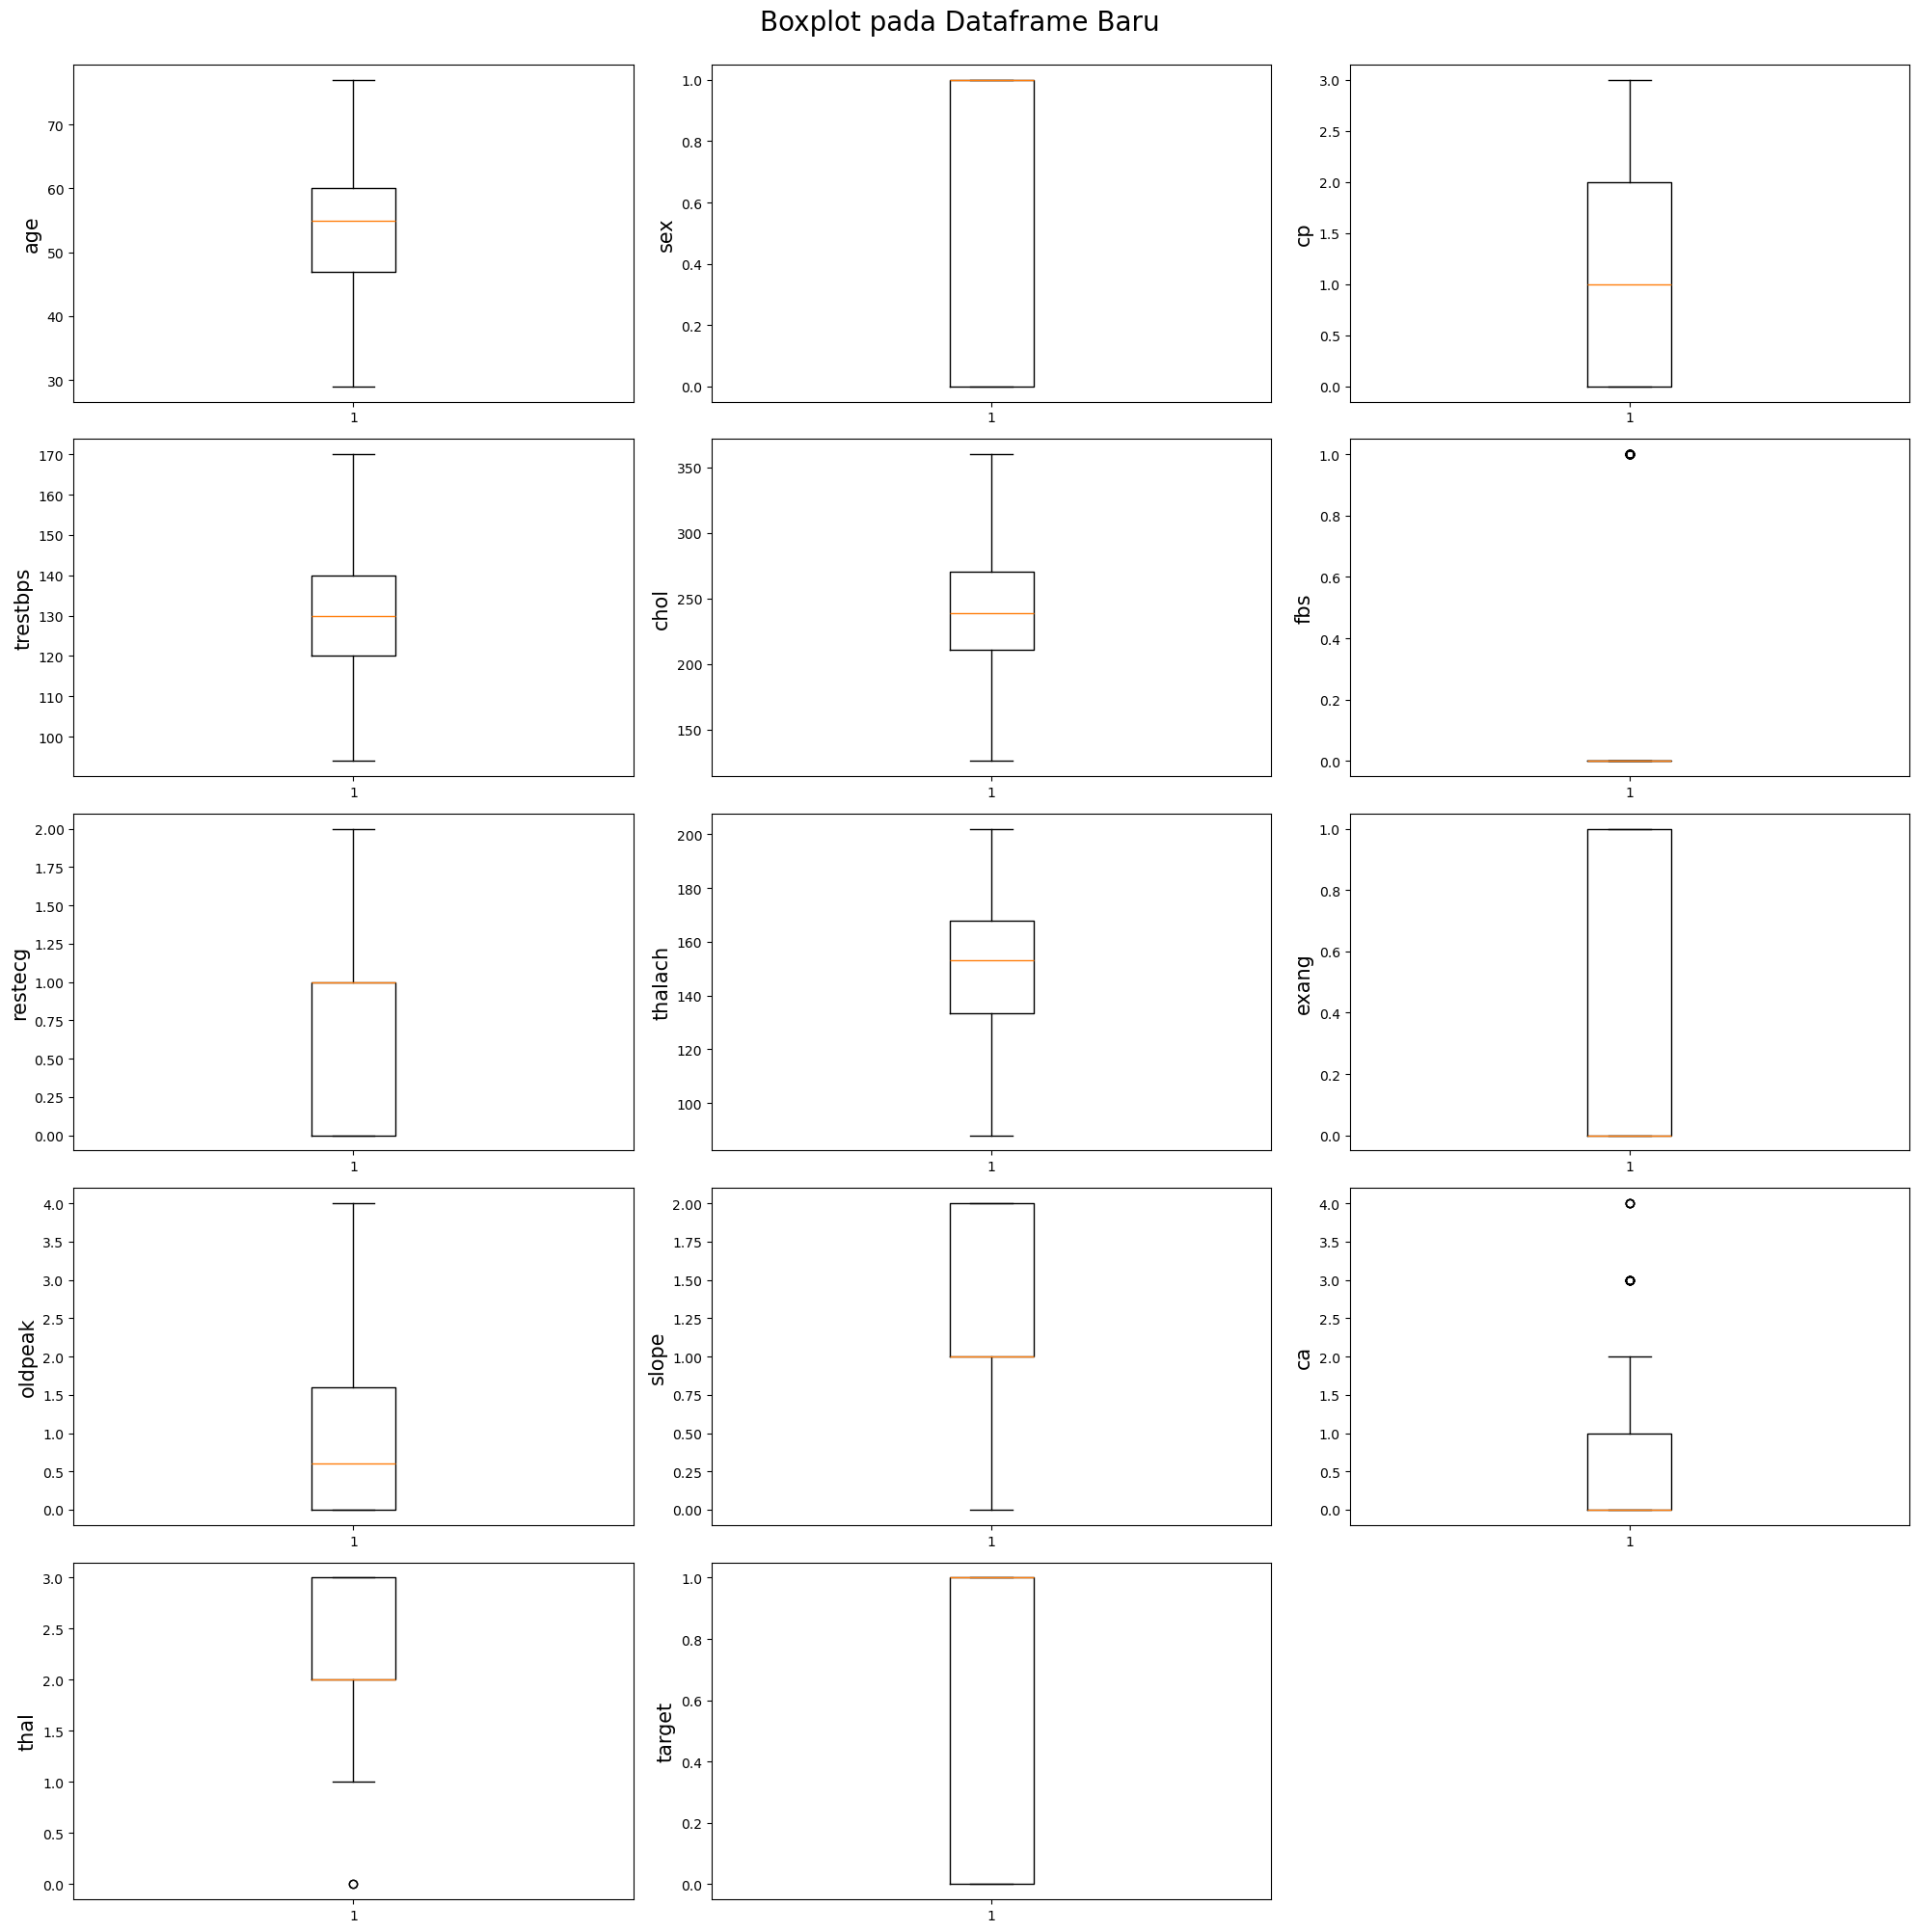

In [12]:
# Create a new figure with a specific size
plt.figure(figsize=(20,20))

# Initialize the plot number
plotnumber = 1

# Loop through each column in the dataframe
for column in data2.columns:
    # Check if the plot number is less than 15 (to ensure we have enough subplots)
    if plotnumber < 15:
        # Create a subplot with 5 rows and 3 columns, and increment the plot number
        plt.subplot(5, 3, plotnumber)
        
        # Create a boxplot for the current column
        plt.boxplot(data2[column])
        
        # Set the y-axis label to the column name
        plt.ylabel(column, fontsize=15)
        
    # Increment the plot number
    plotnumber += 1

# Add a title to the overall plot
plt.suptitle('Boxplot pada Dataframe Baru', fontsize=20, y=1)

# Adjust the layout of subplots for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Unique values in sex: [1 0]
Unique values in cp: [0 1 2 3]
Unique values in fbs: [0 1]
Unique values in restecg: [1 0 2]
Unique values in exang: [0 1]
Unique values in slope: [2 0 1]
Unique values in ca: [2 0 1 3 4]
Unique values in thal: [3 2 0 1]
Unique values in target: [0 1]
Summary statistics for age:
count    283.000000
mean      54.049470
std        9.128186
min       29.000000
25%       47.000000
50%       55.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64
Summary statistics for trestbps:
count    283.000000
mean     129.883392
std       15.387795
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: trestbps, dtype: float64
Summary statistics for chol:
count    283.000000
mean     242.314488
std       44.654188
min      126.000000
25%      210.500000
50%      239.000000
75%      270.500000
max      360.000000
Name: chol, dtype: float64
Summary statistics for thalach:
count    283.000000
mean     149.9

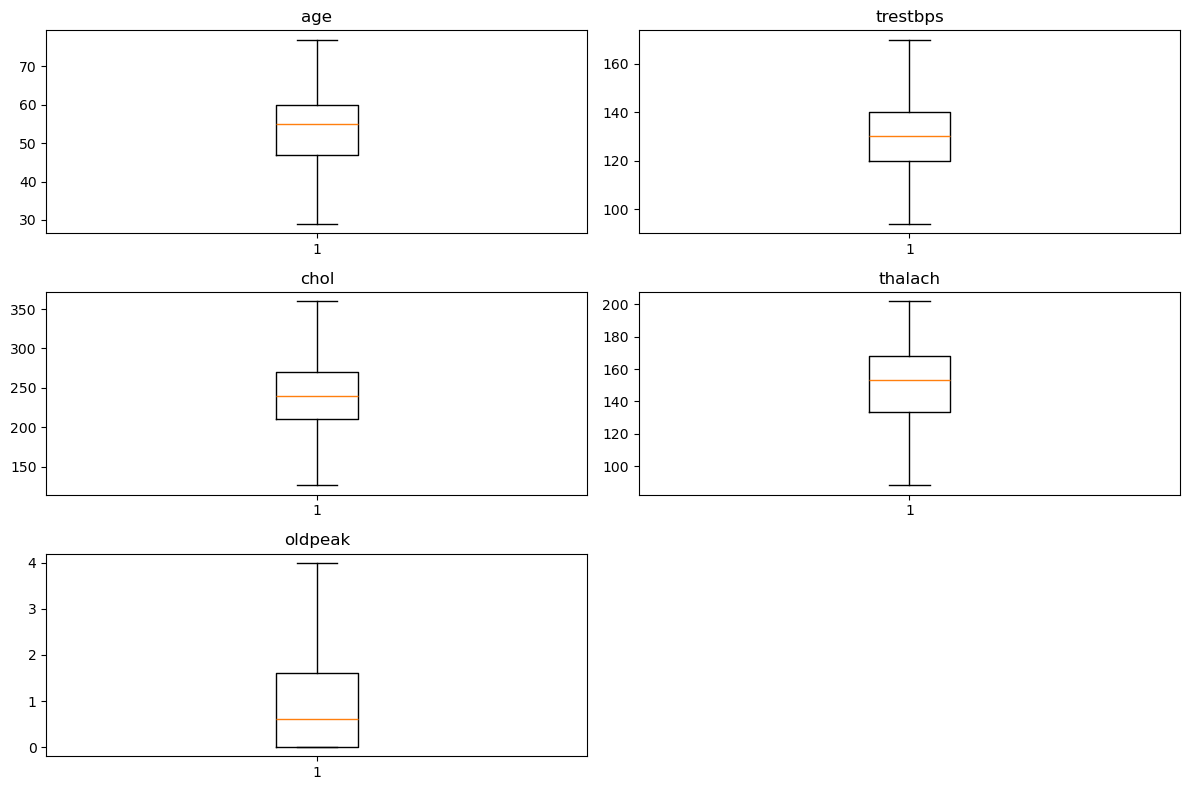

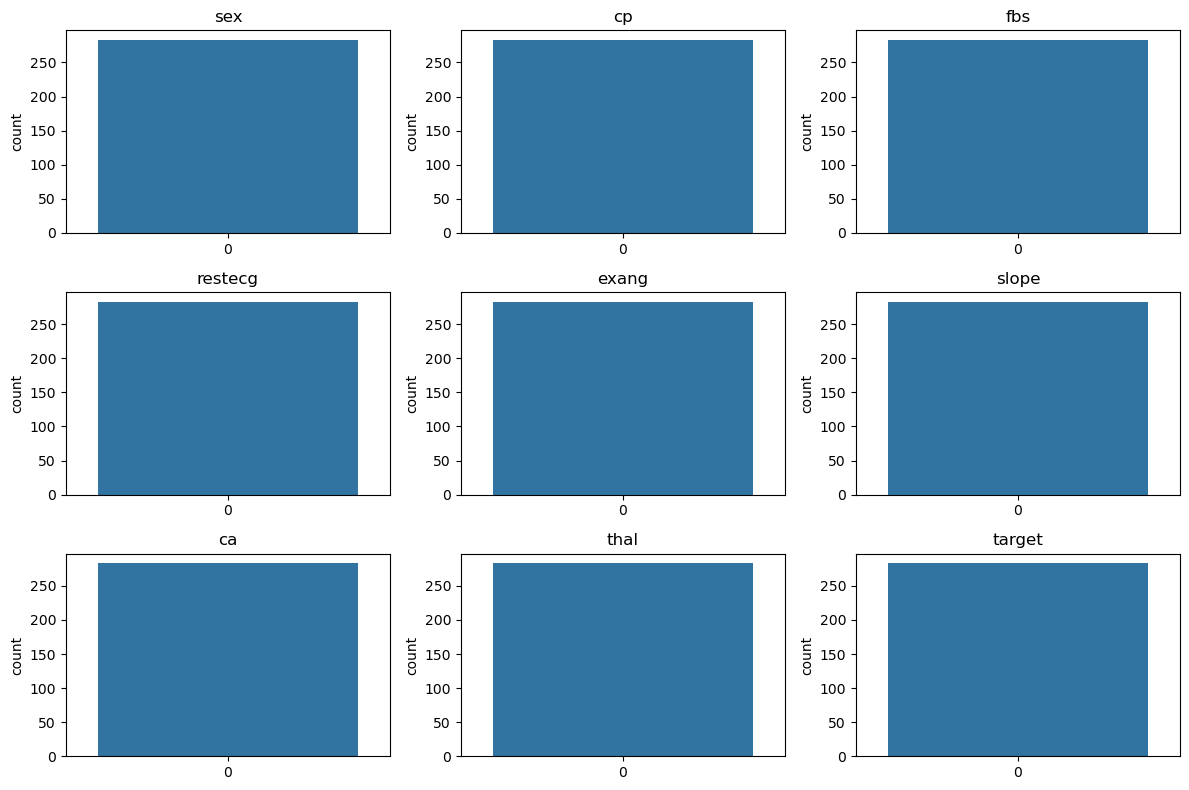

In [13]:
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Check for inconsistencies in categorical variables
for column in categorical_vars:
    print(f"Unique values in {column}: {data2[column].unique()}")

# Check for inconsistencies in numerical variables
for column in numerical_vars:
    print(f"Summary statistics for {column}:")
    print(data2[column].describe())

# Check for unexpected values or outliers in numerical variables using box plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_vars, 1):
    plt.subplot(3, 2, i)  # Adjusting layout to 3 rows and 2 columns
    plt.boxplot(data2[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Check for distribution of categorical variables using count plots
plt.figure(figsize=(12, 8))
for column in categorical_vars:
    plt.subplot(3, 3, categorical_vars.index(column) + 1)
    sns.countplot(data2[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [ ]:
# exploratory data analysis (EDA) 

In [14]:
#Dataset charecteristics
print(data2.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  283.000000  283.000000  283.000000  283.000000  283.000000  283.000000   
mean    54.049470    0.699647    0.985866  129.883392  242.314488    0.141343   
std      9.128186    0.459224    1.031324   15.387795   44.654188    0.348992   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  210.500000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  239.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  270.500000    0.000000   
max     77.000000    1.000000    3.000000  170.000000  360.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  283.000000  283.000000  283.000000  283.000000  283.000000  283.000000   
mean     0.522968  149.961131    0.318021    0.951943    1.427562    0.696113   
std      0.514336   22.6916

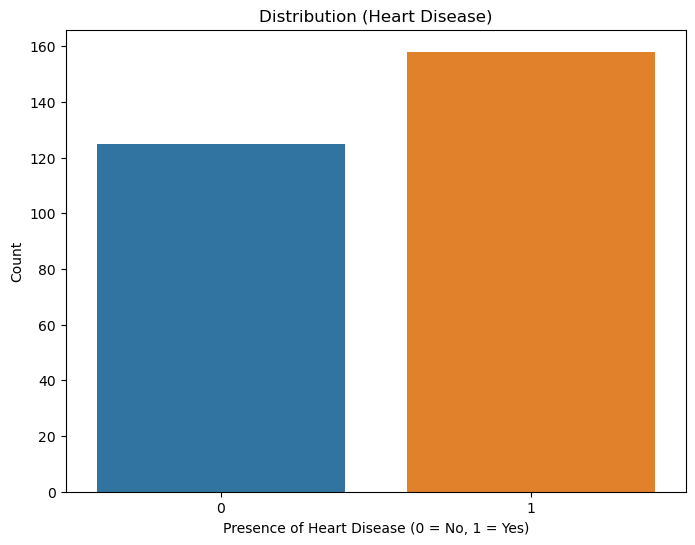

In [15]:
#Dataset distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data2)
plt.title('Distribution (Heart Disease)')
plt.xlabel('Presence of Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [16]:
target_counts = data['target'].value_counts(normalize=True) * 100
print("Percentage of individuals with and without heart disease:")
print(target_counts)

Percentage of individuals with and without heart disease:
target
1    54.304636
0    45.695364
Name: proportion, dtype: float64


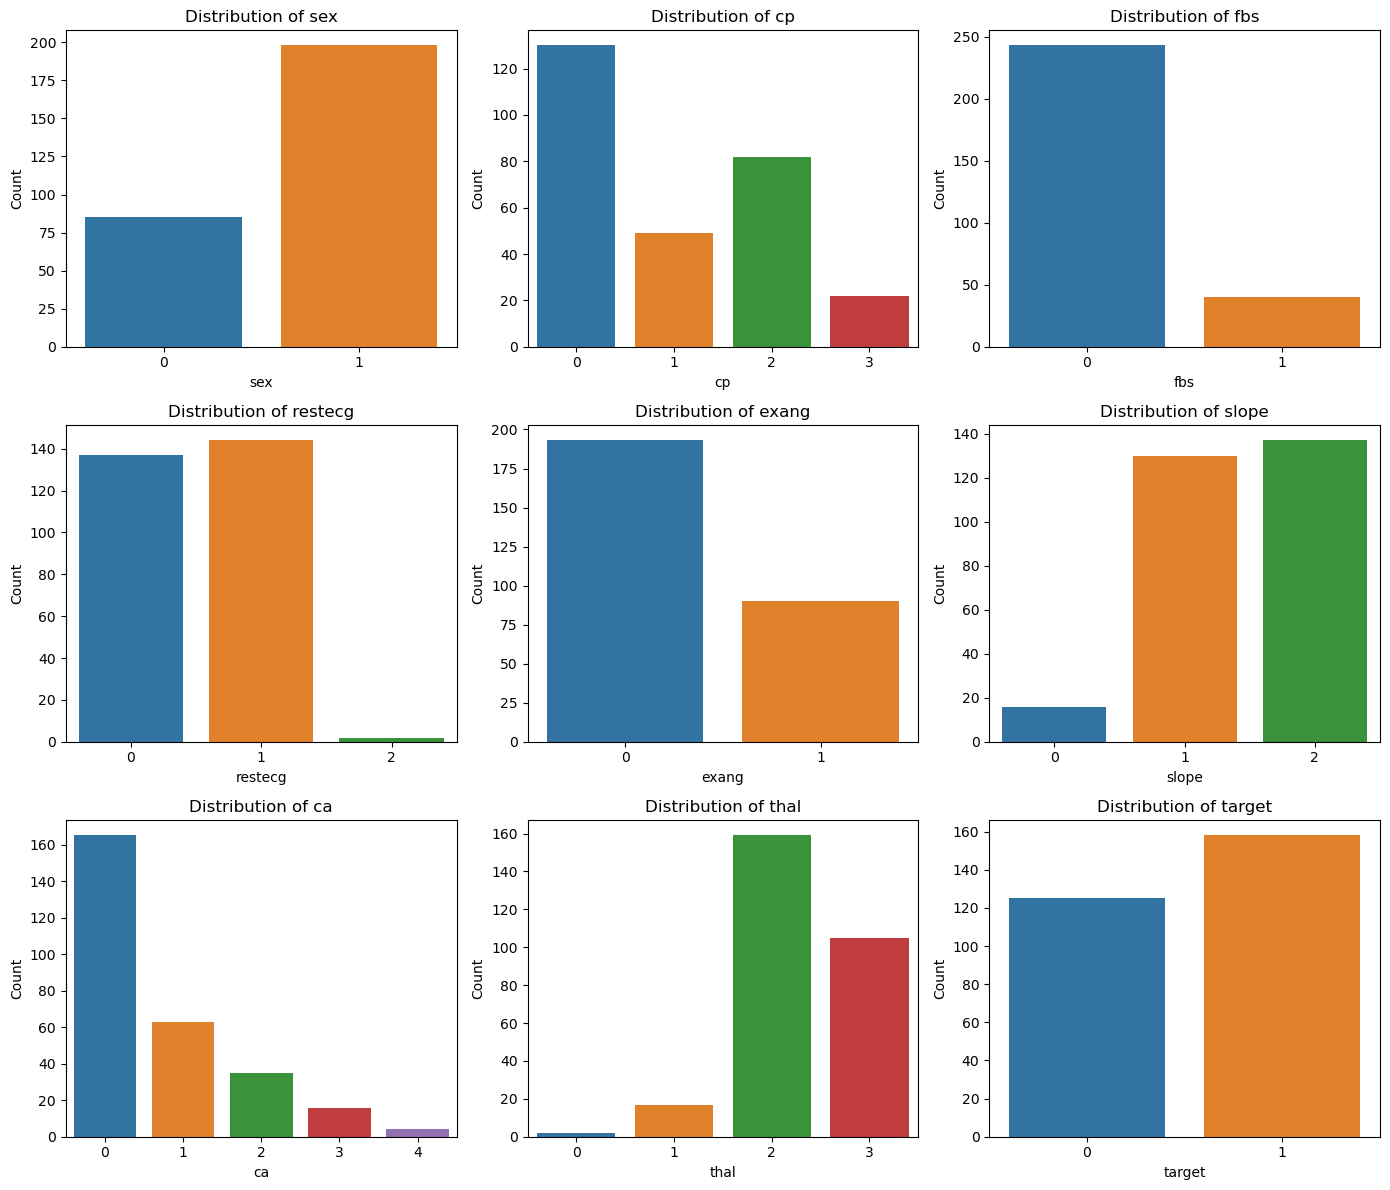

In [17]:
#Categorical variables distribution
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
plt.figure(figsize=(14, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=var, data=data2)
    plt.title(f'Distribution of {var}') 
    plt.xlabel(var)  
    plt.ylabel('Count')  

plt.tight_layout() 
plt.show()  

C:\Users\MIRA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MIRA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MIRA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MIRA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

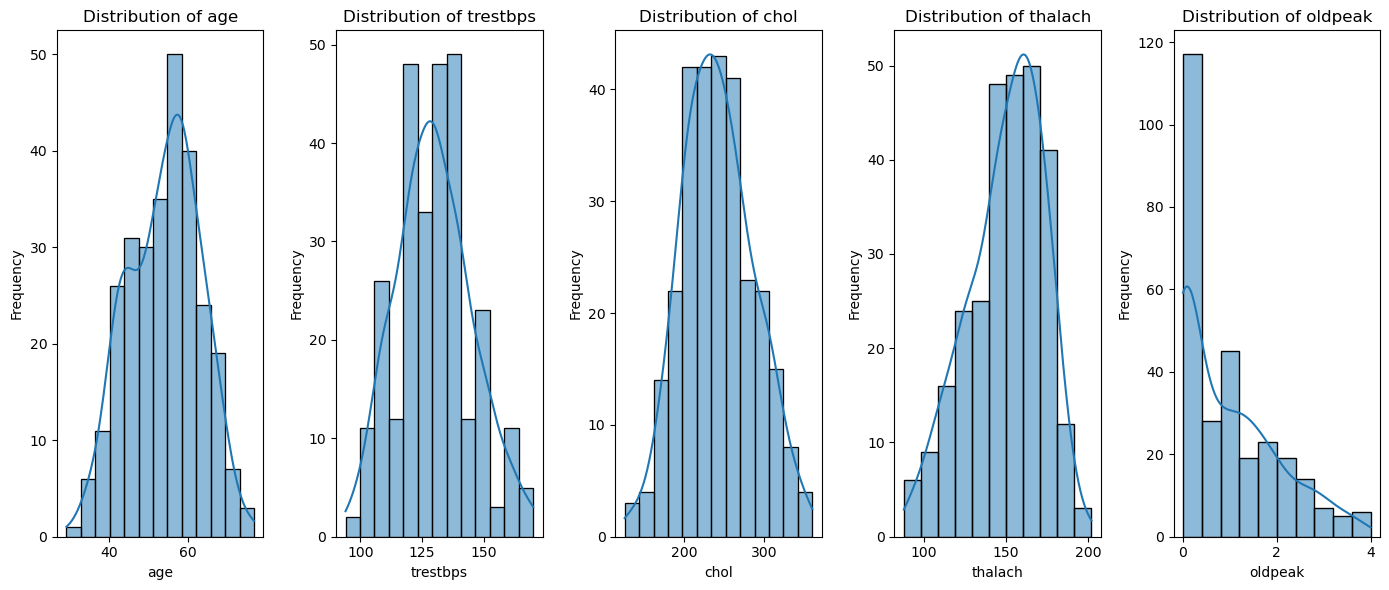

C:\Users\MIRA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MIRA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MIRA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MIRA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

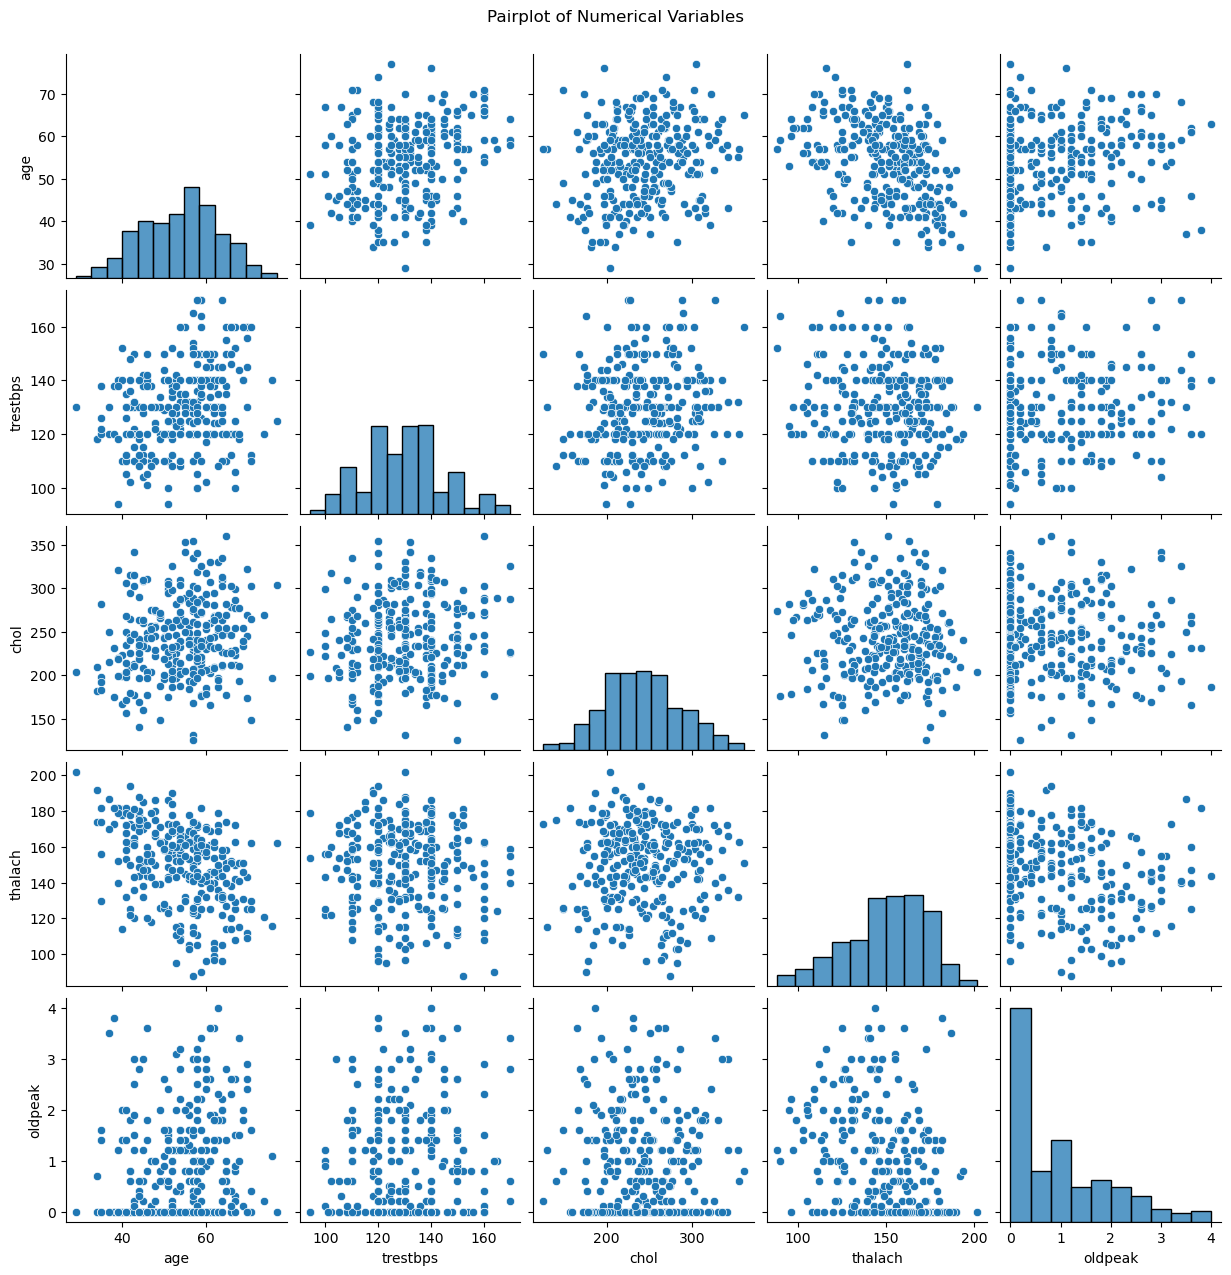

In [18]:
#Distribution and Relationships of Numerical Variables
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Plot histograms for numerical variables
plt.figure(figsize=(14, 6))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 5, i)
    sns.histplot(data2[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between numerical variables
sns.pairplot(data2[numerical_vars])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

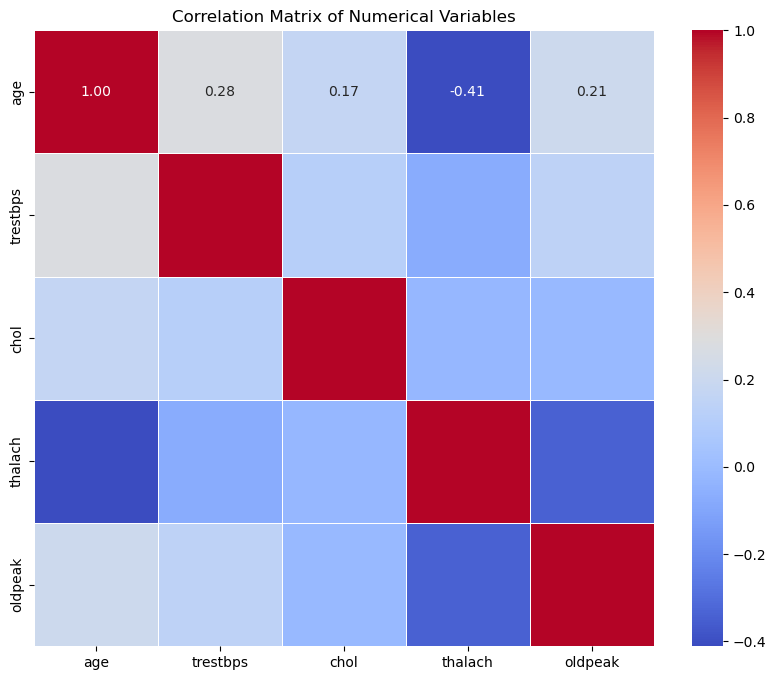

In [19]:
#Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(data2[numerical_vars].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [22]:
# Feature Engineering
# Age Group
data2.loc[:, 'age_group'] = pd.cut(data2['age'], bins=[0, 40, 60, 80, 100], labels=['<40', '40-59', '60-79', '80+'])

# Total Cholesterol
data2.loc[:, 'total_chol'] = data2['chol'] + data2['fbs']

# Exercise Induced Angina & Max Heart Rate Interaction
data2.loc[:, 'exang_thalach_interaction'] = data2['exang'] * data2['thalach']

# Interaction feature: Multiply 'age' and 'chol' columns
data2.loc[:, 'age_chol_interaction'] = data2['age'] * data2['chol']

# Interaction feature: Multiply 'thalach' and 'exang' columns
data2.loc[:, 'thalach_exang_interaction'] = data2['thalach'] * data2['exang']

# Display the updated DataFrame with new features
print(data2.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target age_group  total_chol  exang_thalach_interaction  \
0   2     3       0     40-59         212                          0   
1   0     3       0     40-59         204                        155   
2   0     3       0     60-79         174                        125   
3   1     3       0     60-79         203                          0   
4   3     2       0     60-79         295                          0   

   age_chol_interaction  thalach_exang_interaction  
0                 11024    

In [23]:
# Perform one-hot encoding on categorical variables using pandas
encoded_data = pd.get_dummies(data2, columns=['sex', 'cp', 'thal'])

# Display the updated DataFrame with one-hot encoded variables
print(encoded_data.head())

   age  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  ...  \
0   52       125   212    0        1      168      0      1.0      2   2  ...   
1   53       140   203    1        0      155      1      3.1      0   0  ...   
2   70       145   174    0        1      125      1      2.6      0   0  ...   
3   61       148   203    0        1      161      0      0.0      2   1  ...   
4   62       138   294    1        1      106      0      1.9      1   3  ...   

   sex_0  sex_1  cp_0   cp_1   cp_2   cp_3  thal_0  thal_1  thal_2  thal_3  
0  False   True  True  False  False  False   False   False   False    True  
1  False   True  True  False  False  False   False   False   False    True  
2  False   True  True  False  False  False   False   False   False    True  
3  False   True  True  False  False  False   False   False   False    True  
4   True  False  True  False  False  False   False   False    True   False  

[5 rows x 26 columns]


In [24]:
# Define the ranges for age groups
age_bins = [18, 30, 50, float('inf')]

# Define the labels for age groups
age_labels = ['young', 'middle-aged', 'elderly']

# Perform binning on the 'age' variable
data2.loc[:, 'age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Display the updated DataFrame with age groups
print(data2[['age', 'age_group']].head())

   age age_group
0   52   elderly
1   53   elderly
2   70   elderly
3   61   elderly
4   62   elderly


In [25]:
#Feature Scaling and Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data2.loc[:, numerical_vars] = scaler.fit_transform(data2[numerical_vars])

In [27]:
#Feature selection
print(data2.columns)

selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'total_chol', 'exang_thalach_interaction', 'age_chol_interaction',
       'thalach_exang_interaction']

data_selected = data2[selected_features]
print(data_selected.head())

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_group',
       'total_chol', 'exang_thalach_interaction', 'age_chol_interaction',
       'thalach_exang_interaction'],
      dtype='object')
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.224919    1   0 -0.317917 -0.680075    0        1  0.796365      0   
1 -0.115174    1   0  0.658608 -0.881981    1        0  0.222452      1   
2  1.750489    1   0  0.984117 -1.532566    0        1 -1.101964      1   
3  0.762785    1   0  1.179422 -0.881981    0        1  0.487335      0   
4  0.872530    0   0  0.528405  1.159512    1        1 -1.940760      0   

    oldpeak  slope  ca  thal  target  total_chol  exang_thalach_interaction  \
0  0.046903      2   2     3       0         212                          0   
1  2.096513      0   0     3       0         204                        155   
2  1.608511      0   0     3  

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Split the dataset into features (X) and target variable (y)
X = data_selected.drop('target', axis=1)
y = data_selected['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model with increased maximum iterations
logistic_model = LogisticRegression(max_iter=1000)

# Define the models
models = {
    'Logistic Regression': logistic_model,
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC-AUC': roc_auc}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                        Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression     0.842105   0.823529  0.903226  0.861538  0.836228
Random Forest           0.824561   0.800000  0.903226  0.848485  0.816998
Support Vector Machine  0.614035   0.588235  0.967742  0.731707  0.580025
Gradient Boosting       0.771930   0.764706  0.838710  0.800000  0.765509


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# Define hyperparameters grid for Logistic Regression
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize GridSearchCV for Logistic Regression
logistic_grid_search = GridSearchCV(LogisticRegression(), logistic_params, cv=5, scoring='accuracy')

# Fit the grid search to the data
logistic_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters for Logistic Regression
best_logistic_params = logistic_grid_search.best_params_

# Train Logistic Regression model with the best hyperparameters
best_logistic_model = LogisticRegression(**best_logistic_params)
best_logistic_model.fit(X_train_scaled, y_train)

# Evaluate the logistic regression model
logistic_accuracy = best_logistic_model.score(X_test_scaled, y_test)
print("Logistic Regression Accuracy:", logistic_accuracy)

Logistic Regression Accuracy: 0.8771929824561403


In [34]:
import pickle
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
logistic_regression_model = LogisticRegression()

# Define the filename for saving the model
filename = 'Heart_disease_model2.sav'

# Pickle the model
with open(filename, 'wb') as file:
    pickle.dump(logistic_regression_model, file)
